## Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Reading the data

In [2]:
df=pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Dropping unnecessary column to improve visibility

In [4]:
df=df.drop(columns=['RowNumber','Surname','CustomerId'])

## Initial observations

In [5]:
df.shape

(10000, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [7]:
df.nunique(axis=0)

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

In [8]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
df[['CreditScore','Age','Tenure','Balance','EstimatedSalary']].describe().round(2)

,CreditScore,Age,Tenure,Balance,EstimatedSalary
count,10000.00,10000.00,10000.00,10000.00,10000.00
mean,650.53,38.92,5.01,76485.89,100090.24
std,96.65,10.49,2.89,62397.41,57510.49
min,350.00,18.00,0.00,0.00,11.58
25%,584.00,32.00,3.00,0.00,51002.11
50%,652.00,37.00,5.00,97198.54,100193.92
75%,718.00,44.00,7.00,127644.24,149388.25
max,850.00,92.00,10.00,250898.09,199992.48


In [10]:
df[['Age','EstimatedSalary','Balance','CreditScore']].agg(['skew','kurtosis']).transpose()

,skew,kurtosis
Age,1.011320,1.395347
EstimatedSalary,0.002085,-1.181518
Balance,-0.141109,-1.489412
CreditScore,-0.071607,-0.425726


### Looks like Age attribute is highly skewed.

<AxesSubplot: xlabel='Age', ylabel='Count'>

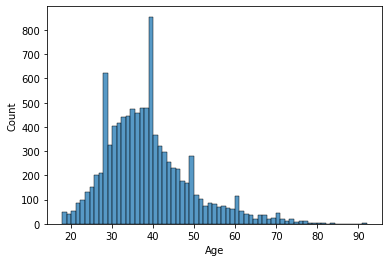

In [11]:
sns.histplot(df['Age'])

### This histogram is a confirmation. We can drop some extreme values.

In [12]:
df=df[df['Age']<62]

In [13]:
df.shape

(9589, 11)

### Let's see if dropping extreme values make thing better.

<AxesSubplot: xlabel='Age', ylabel='Count'>

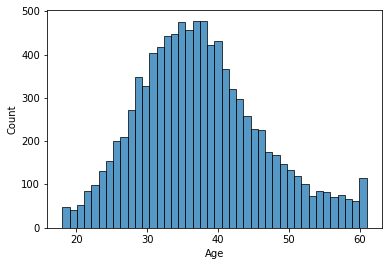

In [14]:
sns.histplot(df['Age'])

In [15]:
df[['Age','EstimatedSalary','Balance','CreditScore']].agg(['skew','kurtosis']).transpose()

,skew,kurtosis
Age,0.447215,-0.066750
EstimatedSalary,-0.002566,-1.180225
Balance,-0.140901,-1.486291
CreditScore,-0.072742,-0.422768


### This looks much better.

In [16]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [17]:
df.groupby(by='Geography')['Age'].count()

Geography
France     4808
Germany    2411
Spain      2370
Name: Age, dtype: int64

### We can clearly see that France has the largest customer base.

In [18]:
df['Balance'].mean()

76552.23676087183

In [19]:
df.groupby(by='Gender')['Age'].count()

Gender
Female    4353
Male      5236
Name: Age, dtype: int64

### Male users are more in number.

In [20]:
df.groupby(by='Gender')['Balance'].mean()

Gender
Female    75737.959694
Male      77229.193994
Name: Balance, dtype: float64

In [21]:
df.groupby(by='Gender')['EstimatedSalary'].mean().round(2)

Gender
Female    100642.83
Male       99832.36
Name: EstimatedSalary, dtype: float64

### Female users have lesser balance inspite of the fact that they are earning more.

In [22]:
print(df.groupby(by=['Gender','Geography'])[['Balance','CreditScore','EstimatedSalary','Age']].mean().round(2))
print(df.groupby(by=['Gender','Geography'])[['Balance','CreditScore','EstimatedSalary','Age']].median().round(2))

                    Balance  CreditScore  EstimatedSalary    Age
Gender Geography                                                
Female France      60404.55       648.81         99793.97  37.37
       Germany    119012.82       653.29        102547.28  39.08
       Spain       59835.04       651.44        100303.08  37.97
Male   France      63684.28       649.54        100402.99  37.11
       Germany    120465.91       650.03        100160.65  38.16
       Spain       63128.29       650.93         98380.39  37.28
                    Balance  CreditScore  EstimatedSalary   Age
Gender Geography                                               
Female France      47954.38        653.0         99377.64  37.0
       Germany    118907.60        651.0        104617.99  38.0
       Spain        6229.60        652.0        102495.36  37.0
Male   France      70419.54        653.0         99746.76  36.0
       Germany    120419.28        650.0         99130.92  37.0
       Spain       69456.48     

### Mean credit Score and Age are homogeneous in nature.

In [23]:
df['IsActiveMember'].value_counts()

1    4815
0    4774
Name: IsActiveMember, dtype: int64

### Non-Active members are very high in number, which should not be the case for an ideal bussiness.

In [24]:
df['Exited'].value_counts()

0    7646
1    1943
Name: Exited, dtype: int64

### Almost 20% users have exited the service. Which is not a great sign for the bank.

<AxesSubplot: xlabel='EstimatedSalary', ylabel='Count'>

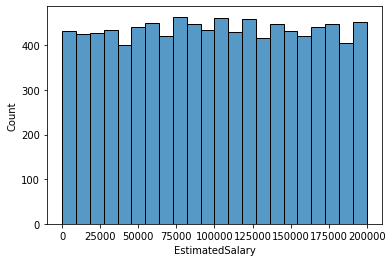

In [25]:
sns.histplot(df['EstimatedSalary'])

<AxesSubplot: xlabel='Geography', ylabel='count'>

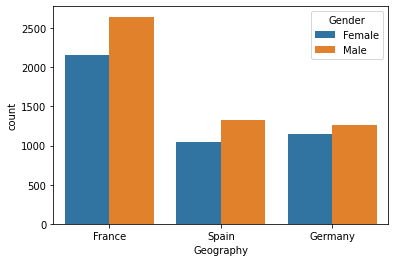

In [26]:
sns.countplot(data=df,x='Geography', hue='Gender')

### Distribution of Gender on the basis of Geography shows that Germany has the least difference between the number of male and female users.

<AxesSubplot: xlabel='Geography', ylabel='count'>

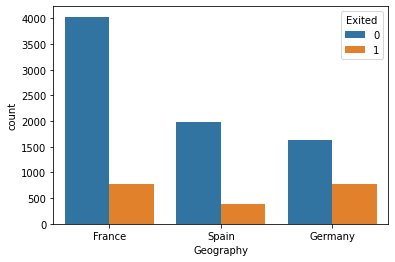

In [27]:
sns.countplot(data=df,x='Geography', hue='Exited')

### Germany seems to have the highest number of customers who exited the service. If we consider Ratio-wise as well, Germany is the worst performing Geography for the bank. 

<AxesSubplot: xlabel='Gender', ylabel='count'>

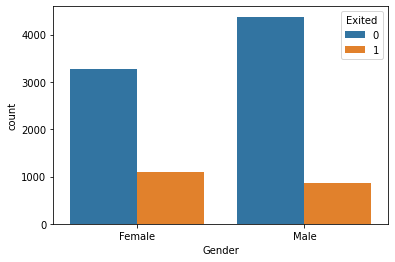

In [28]:
sns.countplot(data=df,x='Gender', hue='Exited')

<AxesSubplot: ylabel='Exited'>

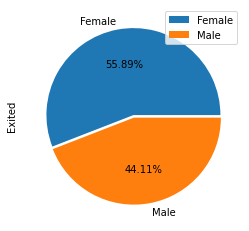

In [29]:
df.groupby(by='Gender').sum('numeric_only').plot(kind='pie',y='Exited',explode=(0,0.03),autopct='%1.2f%%')

### More Female cuatomers leave the service.

<AxesSubplot: ylabel='IsActiveMember'>

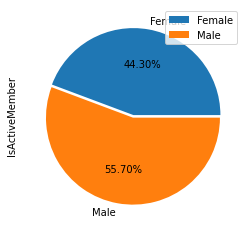

In [30]:
df.groupby(by='Gender').sum('numeric_only').plot(kind='pie',y='IsActiveMember',explode=(0,0.03),autopct='%1.2f%%')

### There are more male active users.

<AxesSubplot: xlabel='EstimatedSalary', ylabel='CreditScore'>

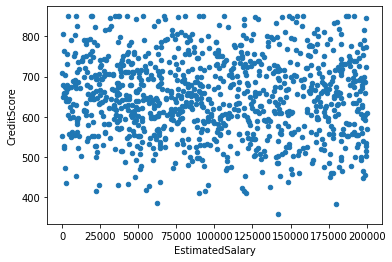

In [31]:
df.sample(1000).plot(kind='scatter',x='EstimatedSalary',y='CreditScore')

### Credit Score doesn't seem to have much impact on Estimated Salary. 

### columns (Just for keeping a tab on spellings.)

In [32]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [33]:
df.groupby(['Gender'])['HasCrCard'].value_counts()

Gender  HasCrCard
Female  1            3060
        0            1293
Male    1            3708
        0            1528
Name: HasCrCard, dtype: int64

### Male users have more credit cards.

In [34]:
df.groupby('HasCrCard')['Exited'].value_counts()

HasCrCard  Exited
0          0         2238
           1          583
1          0         5408
           1         1360
Name: Exited, dtype: int64

In [35]:
df.groupby(by=['Geography','NumOfProducts','HasCrCard'])['Exited'].value_counts()

Geography  NumOfProducts  HasCrCard  Exited
France     1              0          0          541
                                     1          150
                          1          0         1329
                                     1          393
           2              0          0          629
                                     1           46
                          1          0         1516
                                     1           80
           3              0          1           20
                                     0            5
                          1          1           58
                                     0           13
           4              0          1           13
                          1          1           15
Germany    1              0          0          213
                                     1          166
                          1          0          527
                                     1          386
           2        

### People who use 4 products are always exiting, irrespective of any other condition.

In [36]:
df.groupby(by=['Geography','Gender'])['Exited'].value_counts()

Geography  Gender  Exited
France     Female  0         1722
                   1          438
           Male    0         2311
                   1          337
Germany    Female  0          724
                   1          425
           Male    0          911
                   1          351
Spain      Female  0          821
                   1          223
           Male    0         1157
                   1          169
Name: Exited, dtype: int64

### Female users are more likely to exit the service, bank should take more steps towards this factor.

### After this basic data analysis, we can now move on to Standarization/ Normalization of data.

In [37]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [38]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### converting categorical data into numeric data

In [39]:
df=pd.get_dummies(data=df, columns=['Geography','Gender'])
df.head(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
5,645,44,8,113755.78,2,1,0,149756.71,1,0,0,1,0,1
6,822,50,7,0.00,2,1,1,10062.80,0,1,0,0,0,1
7,376,29,4,115046.74,4,1,0,119346.88,1,0,1,0,1,0
8,501,44,4,142051.07,2,0,1,74940.50,0,1,0,0,0,1
9,684,27,2,134603.88,1,1,1,71725.73,0,1,0,0,0,1


### Standardizing Balance and Estimated Salary.

In [40]:
ss=StandardScaler()
df[['Balance','EstimatedSalary']]=ss.fit_transform(df[['Balance','EstimatedSalary']])

### Normalizing CreditScore (Since the range is fixed, we are using MinMaxScaler.)

In [41]:
mm= MinMaxScaler()
df[['CreditScore']]=mm.fit_transform(df[['CreditScore']])

### Cross-checking the transformed dataset.

In [42]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.538,42,2,-1.226428,1,1,1,0.019976,1,1,0,0,1,0
1,0.516,41,1,0.116241,1,0,1,0.214656,0,0,0,1,1,0
2,0.304,42,8,1.331465,3,1,0,0.238814,1,1,0,0,1,0
3,0.698,39,1,-1.226428,2,0,0,-0.110850,0,1,0,0,1,0
4,1.000,43,2,0.784355,1,1,1,-0.367251,0,0,0,1,1,0


### Let's split our dataset into training and testing.

In [43]:
columns=['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard','IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_France','Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male']
X=df.drop(columns='Exited', axis=1)
y=df['Exited']

### But first we have to take care of the unbalanced target variable, we are using Random Over Sampler method.

In [44]:
from imblearn.over_sampling import RandomOverSampler

In [45]:
ROS=RandomOverSampler(sampling_strategy='minority')

In [46]:
X_balanced,y_balanced= ROS.fit_resample(X,y)

In [47]:
X_balanced.shape

(15292, 13)

### Now that our data has been resampled, let's go ahead and apply standardization technique.

In [48]:
X_scaled=ss.fit_transform(X_balanced)

In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y_balanced, test_size=0.3, random_state=1)

In [50]:
print('Shape of X_train',X_train.shape)
print('Shape of X_test',X_test.shape)
print('Shape of y_train',y_train.shape)
print('Shape of y_test',y_test.shape)

Shape of X_train (10704, 13)
Shape of X_test (4588, 13)
Shape of y_train (10704,)
Shape of y_test (4588,)


### Let's apply different algorithms first and then we will check for improvements options.

#### 1. Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression(max_iter=3000)
LR.fit(X_train,y_train)

LogisticRegression(max_iter=3000)

In [52]:
y1_pred=LR.predict(X_test)

In [53]:
df_check1=pd.DataFrame({'Actual':y_test, 'Predicted by LR Model':y1_pred})
df_check1.head(10)

,Actual,Predicted by LR Model
2819,0,1
8189,0,1
11680,1,0
14135,1,1
3071,1,1
12218,1,1
12150,1,0
5636,1,1
11492,1,1
7837,1,1


In [54]:
from sklearn import metrics

In [55]:
print(metrics.classification_report(y_test,y1_pred))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74      2287
           1       0.74      0.72      0.73      2301

    accuracy                           0.73      4588
   macro avg       0.73      0.73      0.73      4588
weighted avg       0.73      0.73      0.73      4588



In [56]:
metrics.confusion_matrix(y_test,y1_pred)

array([[1715,  572],
       [ 649, 1652]])

#### Overall accuracy is not so promising. 

#### 2. Decision Tree

In [57]:
from sklearn.tree import DecisionTreeClassifier
DTc=DecisionTreeClassifier(splitter='best')
DTc.fit(X_train,y_train)

DecisionTreeClassifier()

In [58]:
y2_pred=DTc.predict(X_test)

In [59]:
df_check2=pd.DataFrame({'Actual':y_test, 'Predicted by DT':y2_pred})
df_check2.head(10)

,Actual,Predicted by DT
2819,0,0
8189,0,0
11680,1,1
14135,1,1
3071,1,1
12218,1,1
12150,1,1
5636,1,1
11492,1,1
7837,1,1


In [60]:
print(metrics.classification_report(y_test,y2_pred))

              precision    recall  f1-score   support

           0       0.97      0.84      0.90      2287
           1       0.86      0.98      0.91      2301

    accuracy                           0.91      4588
   macro avg       0.91      0.91      0.91      4588
weighted avg       0.91      0.91      0.91      4588



#### Overall accuracy has improved drastically, moreover precision and recall values have improved as well. 

#### 3. Random Forest

In [61]:
from sklearn.ensemble import RandomForestClassifier
RFc=RandomForestClassifier()
RFc.fit(X_train,y_train)

RandomForestClassifier()

In [62]:
y3_pred=RFc.predict(X_test)

In [63]:
df_check3=pd.DataFrame({'Actual':y_test, 'Predicted by RF':y3_pred})
df_check3.head(10)

,Actual,Predicted by RF
2819,0,0
8189,0,1
11680,1,1
14135,1,1
3071,1,1
12218,1,1
12150,1,1
5636,1,1
11492,1,1
7837,1,1


In [64]:
print(metrics.classification_report(y_test,y3_pred))

              precision    recall  f1-score   support

           0       0.97      0.92      0.95      2287
           1       0.93      0.97      0.95      2301

    accuracy                           0.95      4588
   macro avg       0.95      0.95      0.95      4588
weighted avg       0.95      0.95      0.95      4588



#### Overall accuracy is more than Decision Tree.

#### 4. K-Nearest Neighbors

In [65]:
from sklearn.neighbors import KNeighborsClassifier

In [66]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [67]:
y4_pred=knn.predict(X_test)

In [68]:
df_check4=pd.DataFrame({'Actual':y_test, 'Predicted by KNN':y4_pred})
df_check4.head(10)

,Actual,Predicted by KNN
2819,0,0
8189,0,1
11680,1,0
14135,1,1
3071,1,1
12218,1,0
12150,1,0
5636,1,0
11492,1,1
7837,1,1


In [69]:
print(metrics.classification_report(y_test,y4_pred))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80      2287
           1       0.79      0.85      0.82      2301

    accuracy                           0.81      4588
   macro avg       0.81      0.81      0.81      4588
weighted avg       0.81      0.81      0.81      4588



#### 5. AdaBoost

In [70]:
from sklearn.ensemble import AdaBoostClassifier

In [71]:
abc=AdaBoostClassifier()
abc.fit(X_train,y_train)

AdaBoostClassifier()

In [72]:
y5_pred=abc.predict(X_test)

In [73]:
df_check5=pd.DataFrame({'Actual':y_test,'Predicted by AdaBoost':y5_pred})
df_check5.head(10)

,Actual,Predicted by AdaBoost
2819,0,1
8189,0,1
11680,1,1
14135,1,1
3071,1,1
12218,1,1
12150,1,0
5636,1,1
11492,1,1
7837,1,1


In [74]:
print(metrics.classification_report(y_test,y5_pred))

              precision    recall  f1-score   support

           0       0.76      0.81      0.79      2287
           1       0.80      0.75      0.77      2301

    accuracy                           0.78      4588
   macro avg       0.78      0.78      0.78      4588
weighted avg       0.78      0.78      0.78      4588



In [75]:
from xgboost import XGBClassifier

In [76]:
XGBc=XGBClassifier()

In [77]:
XGBc.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [78]:
y6_pred=XGBc.predict(X_test)

In [79]:
df_check6=pd.DataFrame({'Actual':y_test,'Predicted by XGBoost':y6_pred})
df_check6.head(10)

,Actual,Predicted by XGBoost
2819,0,0
8189,0,1
11680,1,1
14135,1,1
3071,1,1
12218,1,1
12150,1,1
5636,1,1
11492,1,1
7837,1,1


In [80]:
print(metrics.classification_report(y_test,y6_pred))

              precision    recall  f1-score   support

           0       0.91      0.86      0.89      2287
           1       0.87      0.92      0.89      2301

    accuracy                           0.89      4588
   macro avg       0.89      0.89      0.89      4588
weighted avg       0.89      0.89      0.89      4588



### Let's check best parameters for each of these models using GridSearchCv.

In [81]:
from sklearn.model_selection import GridSearchCV

#### 1. For Logistic Regression Model

In [82]:
paramgrid={'penalty':['l2'],'solver': ['newton-cg', 'lbfgs', 'liblinear'],'max_iter':[350]}

In [83]:
grid_search1=GridSearchCV(LogisticRegression(random_state=1), paramgrid)

In [84]:
grid_search1.fit(X_train,y_train)

GridSearchCV(estimator=LogisticRegression(random_state=1),
             param_grid={'max_iter': [350], 'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']})

In [85]:
grid_search1.best_params_

{'max_iter': 350, 'penalty': 'l2', 'solver': 'newton-cg'}

In [86]:
grid_search1.best_score_

0.7169286340997088

In [87]:
print(metrics.classification_report(y_test,grid_search1.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74      2287
           1       0.74      0.72      0.73      2301

    accuracy                           0.73      4588
   macro avg       0.73      0.73      0.73      4588
weighted avg       0.73      0.73      0.73      4588



#### No improvement whatsoever.

#### 2. For DTC

In [88]:
params = {'max_depth': [2, 3, 5, 10, 20],'min_samples_leaf': [5, 10, 20, 50, 100],'criterion': ["gini", "entropy",'log_loss']}

In [89]:
grid_search2 = GridSearchCV(DTc, param_grid = params, cv=5, scoring = 'f1')

In [90]:
grid_search2.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='f1')

In [91]:
grid_search2.best_params_

{'criterion': 'log_loss', 'max_depth': 20, 'min_samples_leaf': 5}

In [92]:
grid_search2.best_score_

0.8384594434923965

In [93]:
print(metrics.classification_report(y_test,grid_search2.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      0.82      0.84      2287
           1       0.83      0.87      0.85      2301

    accuracy                           0.85      4588
   macro avg       0.85      0.85      0.85      4588
weighted avg       0.85      0.85      0.85      4588



#### Seems like overall accuracy along with precision and recall reduced. So we will stick to the Decsion tree classifier itself.

#### 3. For Random forest

In [94]:
params={'max_depth':[1,2,3,4,5,6,7,8,9,10], 'n_estimators':[1,2,3,4,5,6,7,8,9,10,15,20,25]}

In [95]:
grid_search3=GridSearchCV(RFc,param_grid=params,scoring='precision')

In [96]:
grid_search3.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20,
                                          25]},
             scoring='precision')

In [97]:
grid_search3.best_estimator_

RandomForestClassifier(max_depth=10, n_estimators=25)

In [98]:
grid_search3.best_score_

0.8505607478482698

In [99]:
print(metrics.classification_report(y_test,grid_search3.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86      2287
           1       0.87      0.84      0.85      2301

    accuracy                           0.85      4588
   macro avg       0.85      0.85      0.85      4588
weighted avg       0.85      0.85      0.85      4588



#### Looks like GridSearch isn't helping much in this case.

In [100]:
print("The best accuracy score for this dataset is :",metrics.accuracy_score(y_test,y3_pred).round(2))

The best accuracy score for this dataset is : 0.95


## From here we can conclude that Random Forest is the best model for this specific case of classification.